In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


1. Tips 데이터
    - 요일별 팁의 비율(bar)
    - 인원수별 팁의 비율(bar)

In [108]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [109]:
tp = tips.pivot_table('tip', 'day')
tp

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


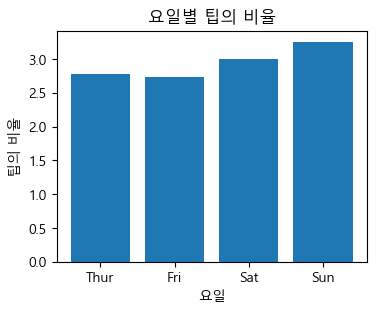

In [110]:
plt.figure(figsize=(4, 3))
plt.bar(tp.index, tp.tip)
plt.title('요일별 팁의 비율')
plt.xlabel('요일'); plt.ylabel('팁의 비율')
plt.show()

In [111]:
stp = tips.pivot_table('tip', 'size')
stp

,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


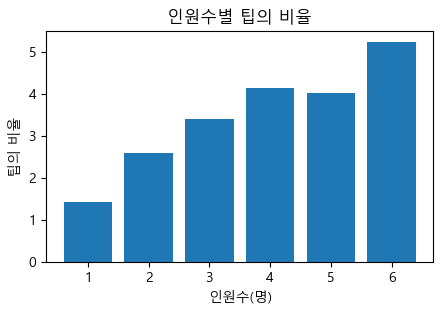

In [112]:
plt.figure(figsize=(5, 3))
plt.bar(stp.index, stp.tip)
plt.title('인원수별 팁의 비율')
plt.xlabel('인원수(명)'); plt.ylabel('팁의 비율');


2. Anscombe 데이터
    - ans = sns.load_dataset('anscombe')
    - 4개 DataSet에 대해 산포도 + 회귀식 그래프

In [113]:
ans = sns.load_dataset('anscombe')
ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


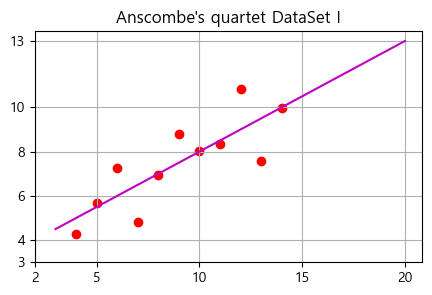

In [137]:
ans1 = ans[ans.dataset=='I']
plt.figure(figsize=(5,3))
plt.scatter(ans1['x'], ans1['y'], color='r')
plt.title("Anscombe's quartet DataSet I")
plt.plot([3, 20], [4.5, 13], 'm')
plt.xticks([2, 5, 10, 15, 20])
plt.yticks([3, 4, 6, 8, 10, 13])
plt.grid()
plt.show()


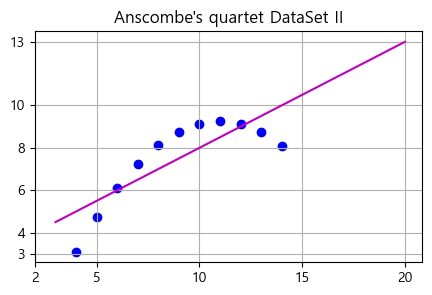

In [136]:
ans2 = ans[ans.dataset=='II']
plt.figure(figsize=(5,3))
plt.scatter(ans2['x'], ans2['y'], color='b')
plt.title("Anscombe's quartet DataSet II")
plt.plot([3, 20], [4.5, 13], 'm')
plt.xticks([2, 5, 10, 15, 20])
plt.yticks([3, 4, 6, 8, 10, 13])
plt.grid()
plt.show()

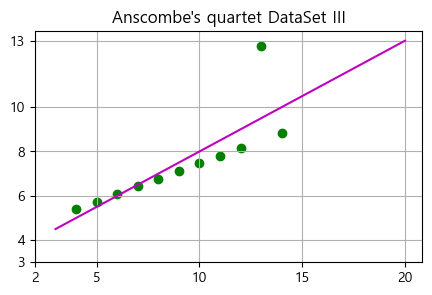

In [135]:
ans3 = ans[ans.dataset=='III']
plt.figure(figsize=(5,3))
plt.scatter(ans3['x'], ans3['y'], color='g')
plt.title("Anscombe's quartet DataSet III")
plt.plot([3, 20], [4.5, 13], 'm')
plt.xticks([2, 5, 10, 15, 20])
plt.yticks([3, 4, 6, 8, 10, 13])
plt.grid()
plt.show()

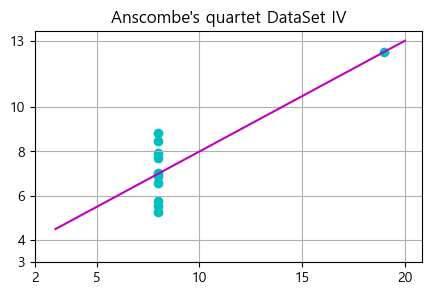

In [134]:
ans4 = ans[ans.dataset=='IV']
plt.figure(figsize=(5,3))
plt.scatter(ans4['x'], ans4['y'], color='c')
plt.title("Anscombe's quartet DataSet IV")
plt.plot([3, 20], [4.5, 13], 'm')
plt.xticks([2, 5, 10, 15, 20])
plt.yticks([3, 4, 6, 8, 10, 13])
plt.grid()
plt.show()

3. 서울시 구별 CCTV 댓수 (barh)
    - 기본순서
    - index로 sort (오름)
    - value로 sort (내림)

In [118]:
columns = '구분,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년'.split(',')
cctv = pd.read_csv('../99.과제/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='euc-kr', usecols=columns, thousands=',')
# cctv = pd.read_csv('data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='euc-kr', usecols=columns, thousands=',')
# cctv = pd.read_csv('data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='euc-kr', thousands=',')
cctv.drop(index=0, inplace=True)
cctv.구분 = cctv.구분.str.replace(' ', '')
# cctv

In [119]:
cctv.head()

,구분,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291
2,중구,2584,130,87,77,236,240,372,386,155,361,403,137
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271


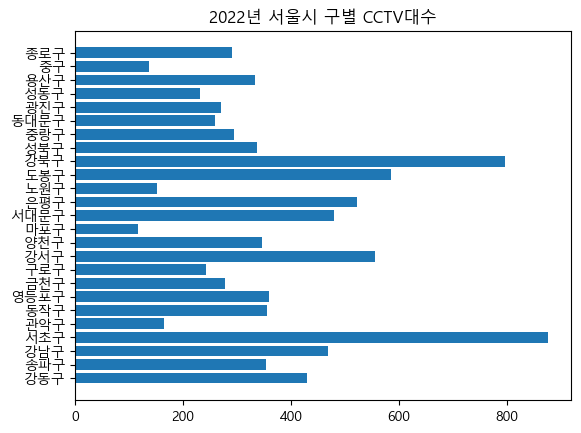

In [140]:
cctv2022 = cctv[['구분', '2022년']].sort_index(ascending=False)
plt.barh(cctv2022['구분'], cctv2022['2022년'])
plt.title('2022년 서울시 구별 CCTV대수')
plt.show()

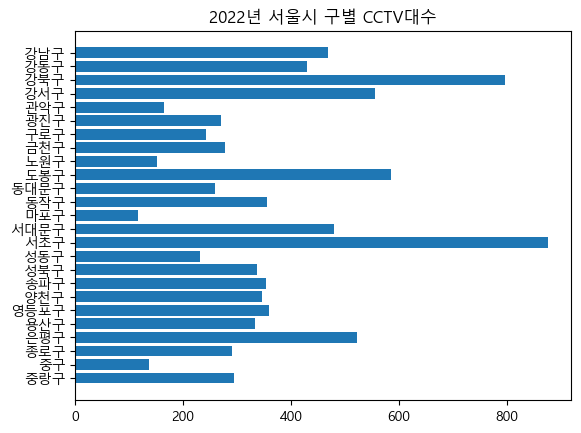

In [139]:
cctv2022_index = cctv[['구분', '2022년']].sort_values('구분', ascending=False)
plt.barh(cctv2022_index['구분'], cctv2022_index['2022년'])
plt.title('2022년 서울시 구별 CCTV대수')
plt.show()

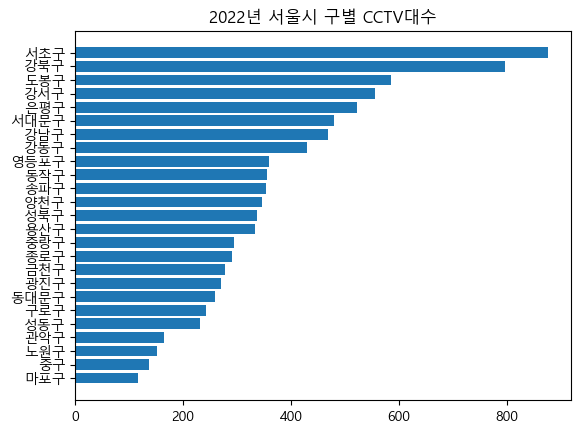

In [138]:
cctv2022_val = cctv[['구분', '2022년']].sort_values('2022년', ascending=True)
plt.barh(cctv2022_val['구분'], cctv2022_val['2022년'])
plt.title('2022년 서울시 구별 CCTV대수')
plt.show()